Import pyspark library, set up SparkContext and SQLContext.

In [1]:
import pyspark
import random

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import seaborn as sns

Fill in the missing values in the Sepallength column with the column's mean.

In [5]:
df = pd.read_csv("iris_missing.csv")

Mean

In [6]:
sepalength = df['Sepallength']

In [7]:
sepalength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepallength, Length: 150, dtype: float64

In [8]:
sepalength.mean()

5.82

In [9]:
mean_ = sepalength.mean()

Sepalength is null

In [10]:
sepalength[sepalength.isnull()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Sepalength is nan

In [11]:
sepalength[sepalength.isna()]

81    NaN
86    NaN
92    NaN
117   NaN
120   NaN
Name: Sepallength, dtype: float64

Fill mean

In [12]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

In [13]:
sepalength.fillna(mean_, inplace=True)

3.1. First, calculate the mean of the Sepallength column.

In [14]:
mean_ = sepalength.mean()

In [15]:
mean_

5.820000000000001

3.2. Now, impute the missing values in the Sepallength column with the column's mean.

In [16]:
sepalength[sepalength.isnull()].fillna(mean_, inplace=True)

4. Compute the correlation matrix for the dataset. Make sure to import the required modules, as shown here:

In [17]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


Now, fill the missing values in the DataFrame before computing the correlation:

In [18]:
df[sepalength.isnull()].fillna(mean_, inplace=True)

/tmp/ipykernel_7723/3031420940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sepalength.isnull()].fillna(mean_, inplace=True)


In [19]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


Next, remove the String columns ('Species') from the PySpark DataFrame.

In [20]:
df.drop(columns=['Species'], inplace = True)

7. Compute the correlation matrix in Spark

In [21]:
df.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.173564,0.861661,0.810511
Sepalwidth,-0.173564,1.000000,-0.447368,-0.413440
Petallength,0.861661,-0.447368,1.000000,0.962530
Petalwidth,0.810511,-0.413440,0.962530,1.000000


9. Plot the variable pairs showing strong positive correlation (more than 0.7) and fit a linear line on them.

In [22]:
df.corr()[df.corr() > 0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


In [23]:
corr_matrix= df.corr()[df.corr() > 0.7]

In [24]:
corr_matrix

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


#### Fit line Sepallength , Petallength

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sepallength', ylabel='Petallength'>

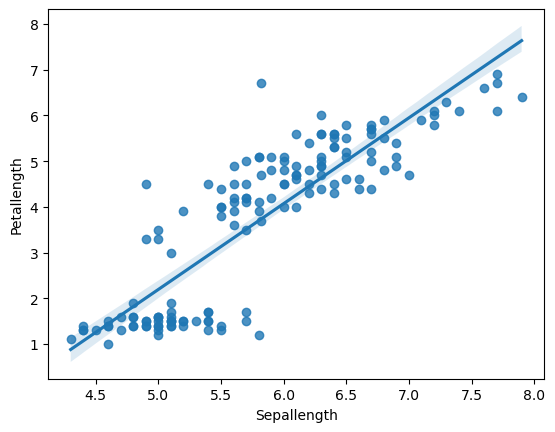

In [25]:
sns.regplot(df.Sepallength,df.Petallength)

In [26]:
corr_matrix_without_zero = corr_matrix.fillna(0)

In [27]:
corr_matrix_without_zero

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.861661,0.810511
Sepalwidth,0.000000,1.0,0.000000,0.000000
Petallength,0.861661,0.0,1.000000,0.962530
Petalwidth,0.810511,0.0,0.962530,1.000000


In [28]:
corr_matrix_without_zero[corr_matrix_without_zero >0.7]

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,NaN,0.861661,0.810511
Sepalwidth,NaN,1.0,NaN,NaN
Petallength,0.861661,NaN,1.000000,0.962530
Petalwidth,0.810511,NaN,0.962530,1.000000


In [29]:
corr_matrix_new = corr_matrix_without_zero.drop(index='Sepalwidth')

In [30]:
corr_matrix_new

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,0.0,0.861661,0.810511
Petallength,0.861661,0.0,1.000000,0.962530
Petalwidth,0.810511,0.0,0.962530,1.000000


In [31]:
corr_matrix_new.drop(columns=['Sepalwidth'])

,Sepallength,Petallength,Petalwidth
Sepallength,1.000000,0.861661,0.810511
Petallength,0.861661,1.000000,0.962530
Petalwidth,0.810511,0.962530,1.000000


In [32]:
columns_ = corr_matrix_new.drop(columns=['Sepalwidth']).columns

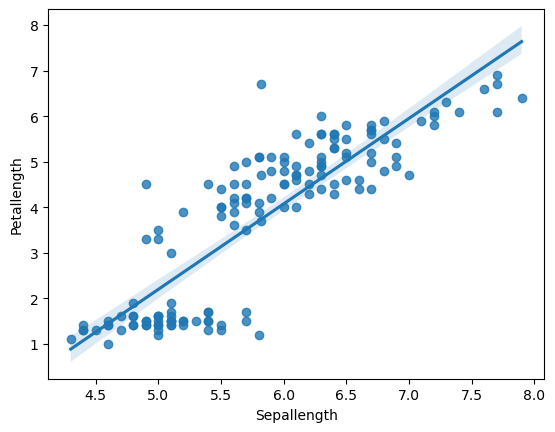

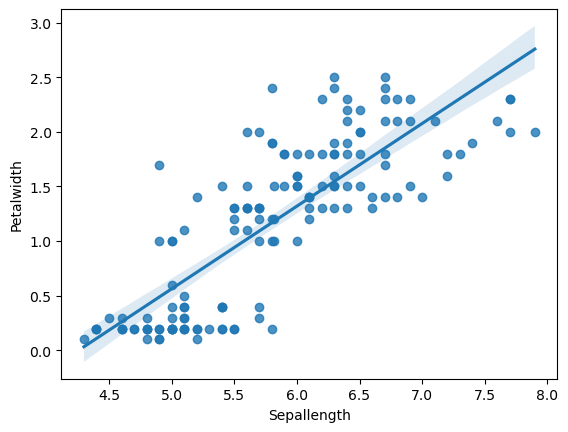

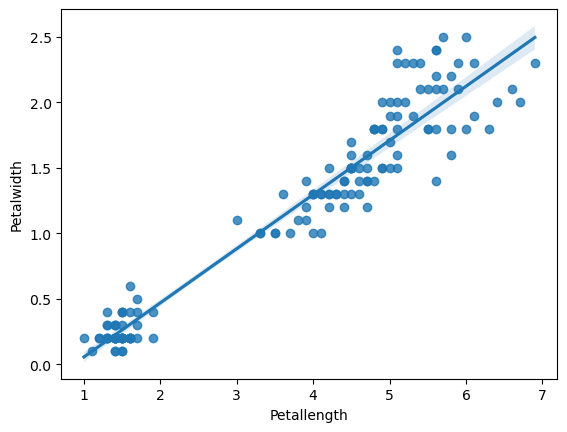

In [44]:

# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
ii=1
for i in range(len(columns_)):
    for j in range(i+1, len(columns_)):
        
        fig = plt.figure()
#         ax = fig.add_subplot(2, 2, ii)
        sns.regplot(df[columns_[i]],df[columns_[j]])
        ii+=1
  
       
        
    
    